# All needed imports

In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from keras.layers import Input, Conv2D, Reshape, UpSampling2D, MaxPool2D, Dense, Flatten
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Model
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras import backend as K

Using TensorFlow backend.


In [2]:
sess = tf.Session()
K.set_session(sess)

# Load mnist dataset

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test .astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test,  (len(x_test),  28, 28, 1))

y_train_cat = to_categorical(y_train).astype(np.float32)
y_test_cat  = to_categorical(y_test).astype(np.float32)

## Create AE submodels 

In [4]:
batch_size = 500
latent_dim = 2
dropout_rate = 0.3

### Encoder

In [5]:
input_ae_encoder = Input(shape=(28, 28, 1))

x = Conv2D(32, kernel_size=(5, 5))(input_ae_encoder)
x = LeakyReLU()(x)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Conv2D(16, kernel_size=(5, 5))(x)
x = LeakyReLU()(x)
x = MaxPool2D(pool_size=(2, 2))(x)

begin_of_dense = Flatten()(x)
x = LeakyReLU()(begin_of_dense)
x = Dense(latent_dim * 4)(x)
x = LeakyReLU()(x)
encoded = Dense(latent_dim, activation='relu')(x)
ae_encoder = Model(input_ae_encoder, encoded, name='Encoder')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



### Decoder

In [6]:
input_ae_decoder = Input(shape=(latent_dim,))

x = Dense(49)(input_ae_decoder)
x = Reshape(target_shape=(7, 7, 1))(x)
x = Conv2D(16, kernel_size=(7, 7), padding='same')(x)
x = LeakyReLU()(x)
x = UpSampling2D(size=(2, 2))(x)
x = Conv2D(32, kernel_size=(5, 5), padding='same')(x)
x = LeakyReLU()(x)
x = UpSampling2D(size=(2, 2))(x)
decoded = Conv2D(1, kernel_size=(7, 7), padding='same', activation='sigmoid')(x)
ae_decoder = Model(input_ae_decoder, decoded, name='Decoder')

### AE Model

In [7]:
ae_model = Model(input_ae_encoder, ae_decoder(ae_encoder(input_ae_encoder)), name='ConvAE')
ae_model.compile(loss='binary_crossentropy', optimizer='adam')
ae_model.summary()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "ConvAE"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
Encoder (Model)              (None, 2)                 15722     
_________________________________________________________________
Decoder (Model)              (None, 28, 28, 1)         15348     
Total params: 31,070
Trainable params: 31,070
Non-trainable params: 0
_________________________________________________________________


### AE Model Training

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 10s 173us/step - loss: 0.2704 - val_loss: 0.2410


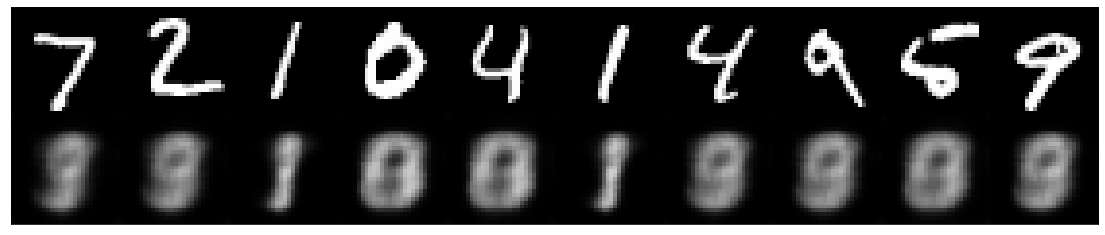


Epoch 2/200
60000/60000 [==============================] - 11s 175us/step - loss: 0.2371 - val_loss: 0.2320
Epoch 3/200
60000/60000 [==============================] - 10s 174us/step - loss: 0.2313 - val_loss: 0.2293
Epoch 4/200
60000/60000 [==============================] - 10s 174us/step - loss: 0.2285 - val_loss: 0.2269
Epoch 5/200
60000/60000 [==============================] - 10s 173us/step - loss: 0.2261 - val_loss: 0.2244
Epoch 6/200
60000/60000 [==============================] - 10s 172us/step - loss: 0.2236 - val_loss: 0.2216
Epoch 7/200
60000/60000 [==============================] - 10s 172us/step - loss: 0.2210 - val_loss: 0.2186
Epoch 8/200
60000/60000 [==============================] - 10s 172us/step - loss: 0.2176 - val_loss: 0.2159
Epoch 9/200
60000/60000 [==============================] - 10s 173us/step - loss: 0.2148 - val_loss: 0.2136
Epoch 10/200
60000/60000 [==============================] - 10s 173us/step - loss: 0.2129 - val_loss: 0.2112
Epoch 11/200
60000/60000 [

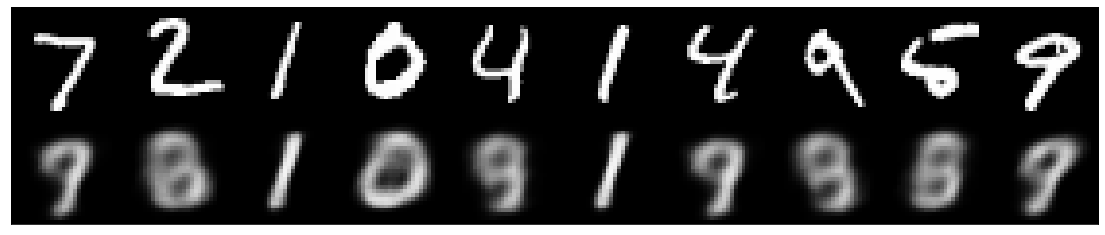

Epoch 13/200
60000/60000 [==============================] - 10s 172us/step - loss: 0.2086 - val_loss: 0.2076
Epoch 14/200
60000/60000 [==============================] - 10s 172us/step - loss: 0.2074 - val_loss: 0.2067
Epoch 15/200
60000/60000 [==============================] - 10s 172us/step - loss: 0.2068 - val_loss: 0.2066
Epoch 16/200
60000/60000 [==============================] - 10s 171us/step - loss: 0.2059 - val_loss: 0.2044
Epoch 17/200
60000/60000 [==============================] - 10s 172us/step - loss: 0.2051 - val_loss: 0.2043
Epoch 18/200
60000/60000 [==============================] - 10s 172us/step - loss: 0.2041 - val_loss: 0.2046
Epoch 19/200
60000/60000 [==============================] - 10s 171us/step - loss: 0.2034 - val_loss: 0.2040
Epoch 20/200
60000/60000 [==============================] - 10s 172us/step - loss: 0.2029 - val_loss: 0.2031
Epoch 21/200
60000/60000 [==============================] - 10s 173us/step - loss: 0.2022 - val_loss: 0.2024
Epoch 22/200
60000/

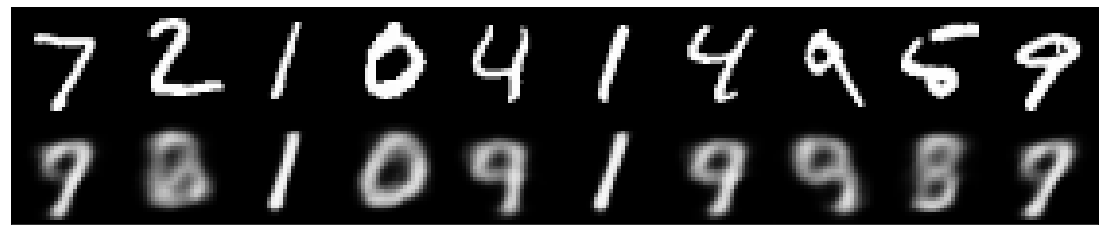

Epoch 24/200
60000/60000 [==============================] - 11s 176us/step - loss: 0.2004 - val_loss: 0.1992
Epoch 25/200
60000/60000 [==============================] - 10s 174us/step - loss: 0.1998 - val_loss: 0.1990
Epoch 26/200
60000/60000 [==============================] - 10s 174us/step - loss: 0.1995 - val_loss: 0.1994
Epoch 27/200
60000/60000 [==============================] - 10s 172us/step - loss: 0.1990 - val_loss: 0.1983
Epoch 28/200
60000/60000 [==============================] - 10s 172us/step - loss: 0.1984 - val_loss: 0.1981
Epoch 29/200
60000/60000 [==============================] - 11s 176us/step - loss: 0.1984 - val_loss: 0.1994
Epoch 30/200
60000/60000 [==============================] - 10s 173us/step - loss: 0.1980 - val_loss: 0.1968
Epoch 31/200
60000/60000 [==============================] - 10s 172us/step - loss: 0.1974 - val_loss: 0.1974
Epoch 32/200
60000/60000 [==============================] - 10s 173us/step - loss: 0.1968 - val_loss: 0.1962
Epoch 33/200
60000/

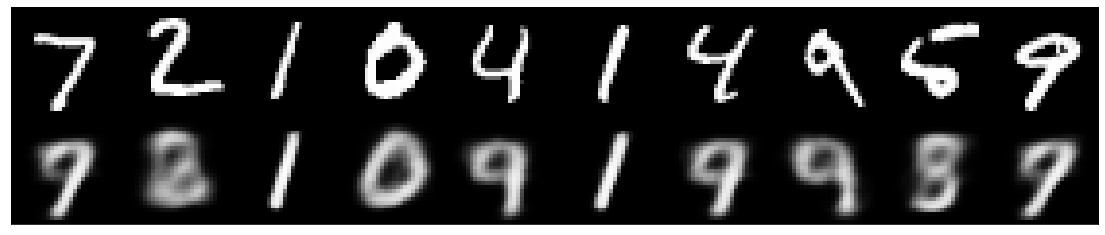

Epoch 35/200
60000/60000 [==============================] - 10s 171us/step - loss: 0.1962 - val_loss: 0.1967
Epoch 36/200
60000/60000 [==============================] - 10s 171us/step - loss: 0.1958 - val_loss: 0.1949
Epoch 37/200
60000/60000 [==============================] - 10s 172us/step - loss: 0.1956 - val_loss: 0.1960
Epoch 38/200
60000/60000 [==============================] - 10s 171us/step - loss: 0.1952 - val_loss: 0.1950
Epoch 39/200
60000/60000 [==============================] - 10s 171us/step - loss: 0.1951 - val_loss: 0.1953
Epoch 40/200
60000/60000 [==============================] - 10s 172us/step - loss: 0.1951 - val_loss: 0.1947
Epoch 41/200
60000/60000 [==============================] - 10s 171us/step - loss: 0.1945 - val_loss: 0.1940
Epoch 42/200
60000/60000 [==============================] - 10s 171us/step - loss: 0.1945 - val_loss: 0.1941
Epoch 43/200
60000/60000 [==============================] - 10s 171us/step - loss: 0.1940 - val_loss: 0.1944
Epoch 44/200
60000/

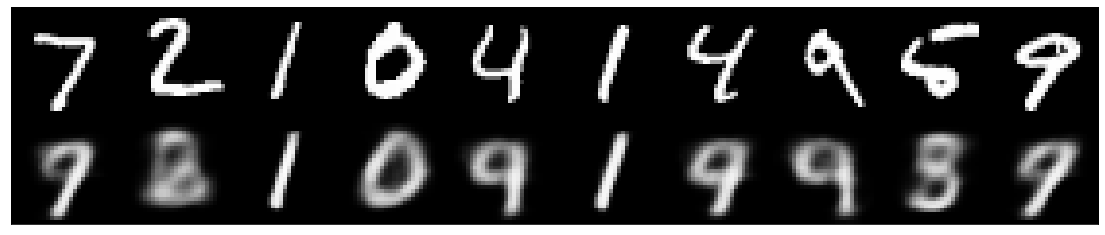

Epoch 46/200
60000/60000 [==============================] - 10s 171us/step - loss: 0.1936 - val_loss: 0.1938
Epoch 47/200
60000/60000 [==============================] - 10s 171us/step - loss: 0.1933 - val_loss: 0.1947
Epoch 48/200
60000/60000 [==============================] - 10s 172us/step - loss: 0.1933 - val_loss: 0.1931
Epoch 49/200
60000/60000 [==============================] - 10s 175us/step - loss: 0.1929 - val_loss: 0.1928
Epoch 50/200
60000/60000 [==============================] - 10s 171us/step - loss: 0.1928 - val_loss: 0.1941
Epoch 51/200
60000/60000 [==============================] - 10s 171us/step - loss: 0.1927 - val_loss: 0.1930
Epoch 52/200
60000/60000 [==============================] - 10s 172us/step - loss: 0.1928 - val_loss: 0.1925
Epoch 53/200
60000/60000 [==============================] - 10s 172us/step - loss: 0.1926 - val_loss: 0.1931
Epoch 54/200
60000/60000 [==============================] - 10s 172us/step - loss: 0.1926 - val_loss: 0.1927
Epoch 55/200
60000/

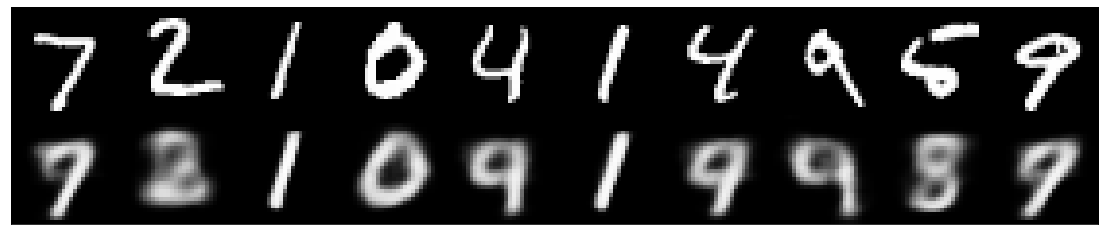

Epoch 57/200
60000/60000 [==============================] - 10s 172us/step - loss: 0.1920 - val_loss: 0.1919
Epoch 58/200
60000/60000 [==============================] - 10s 172us/step - loss: 0.1918 - val_loss: 0.1923
Epoch 59/200
60000/60000 [==============================] - 10s 172us/step - loss: 0.1915 - val_loss: 0.1915
Epoch 60/200
60000/60000 [==============================] - 10s 172us/step - loss: 0.1915 - val_loss: 0.1912
Epoch 61/200
60000/60000 [==============================] - 10s 172us/step - loss: 0.1913 - val_loss: 0.1922
Epoch 62/200
60000/60000 [==============================] - 10s 172us/step - loss: 0.1914 - val_loss: 0.1920
Epoch 63/200
60000/60000 [==============================] - 10s 172us/step - loss: 0.1912 - val_loss: 0.1915
Epoch 64/200
60000/60000 [==============================] - 10s 173us/step - loss: 0.1912 - val_loss: 0.1909
Epoch 65/200
60000/60000 [==============================] - 10s 171us/step - loss: 0.1909 - val_loss: 0.1910
Epoch 66/200
60000/

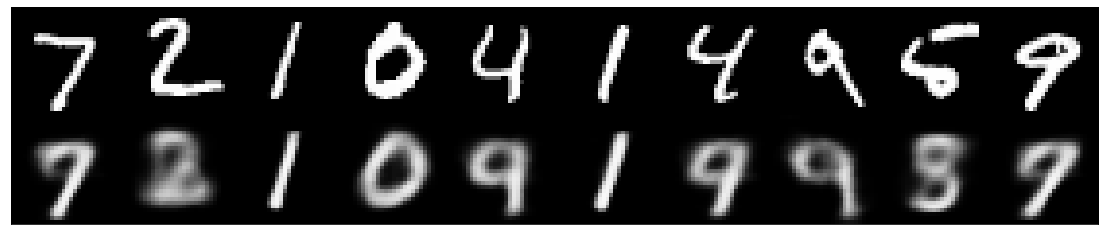

Epoch 68/200
60000/60000 [==============================] - 10s 173us/step - loss: 0.1906 - val_loss: 0.1904
Epoch 69/200
60000/60000 [==============================] - 10s 172us/step - loss: 0.1905 - val_loss: 0.1913
Epoch 70/200
60000/60000 [==============================] - 10s 173us/step - loss: 0.1907 - val_loss: 0.1908
Epoch 71/200
60000/60000 [==============================] - 10s 172us/step - loss: 0.1904 - val_loss: 0.1902
Epoch 72/200
60000/60000 [==============================] - 10s 172us/step - loss: 0.1902 - val_loss: 0.1905
Epoch 73/200
60000/60000 [==============================] - 10s 173us/step - loss: 0.1899 - val_loss: 0.1904
Epoch 74/200
60000/60000 [==============================] - 10s 173us/step - loss: 0.1900 - val_loss: 0.1901
Epoch 75/200
60000/60000 [==============================] - 10s 173us/step - loss: 0.1899 - val_loss: 0.1902
Epoch 76/200
60000/60000 [==============================] - 10s 172us/step - loss: 0.1901 - val_loss: 0.1896
Epoch 77/200
60000/

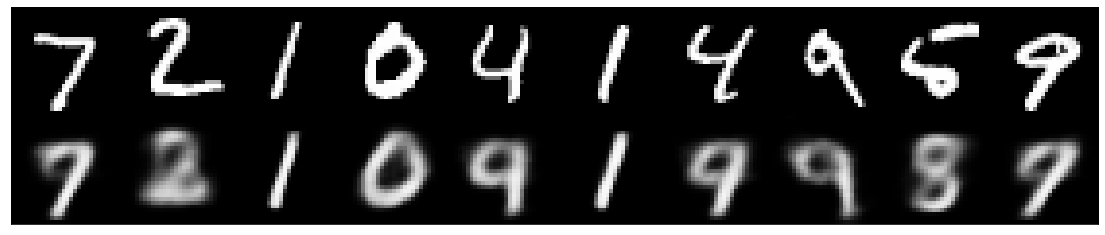

Epoch 79/200
60000/60000 [==============================] - 10s 173us/step - loss: 0.1896 - val_loss: 0.1912
Epoch 80/200
60000/60000 [==============================] - 10s 173us/step - loss: 0.1896 - val_loss: 0.1903
Epoch 81/200
60000/60000 [==============================] - 10s 173us/step - loss: 0.1894 - val_loss: 0.1894
Epoch 82/200
60000/60000 [==============================] - 10s 173us/step - loss: 0.1895 - val_loss: 0.1907
Epoch 83/200
60000/60000 [==============================] - 10s 172us/step - loss: 0.1892 - val_loss: 0.1910
Epoch 84/200
60000/60000 [==============================] - 10s 172us/step - loss: 0.1891 - val_loss: 0.1907
Epoch 85/200
60000/60000 [==============================] - 10s 171us/step - loss: 0.1892 - val_loss: 0.1895
Epoch 86/200
60000/60000 [==============================] - 10s 172us/step - loss: 0.1890 - val_loss: 0.1896
Epoch 87/200
60000/60000 [==============================] - 10s 175us/step - loss: 0.1890 - val_loss: 0.1897
Epoch 88/200
60000/

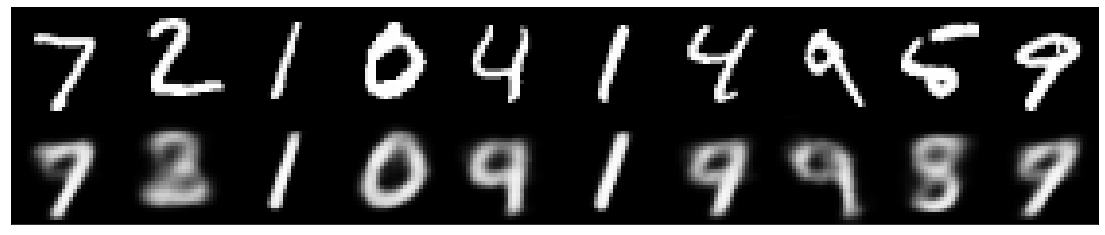

Epoch 90/200
60000/60000 [==============================] - 10s 172us/step - loss: 0.1891 - val_loss: 0.1900
Epoch 91/200
60000/60000 [==============================] - 10s 173us/step - loss: 0.1889 - val_loss: 0.1890
Epoch 92/200
60000/60000 [==============================] - 10s 172us/step - loss: 0.1887 - val_loss: 0.1891
Epoch 93/200
60000/60000 [==============================] - 10s 175us/step - loss: 0.1888 - val_loss: 0.1897
Epoch 94/200
60000/60000 [==============================] - 10s 173us/step - loss: 0.1888 - val_loss: 0.1887
Epoch 95/200
60000/60000 [==============================] - 10s 173us/step - loss: 0.1885 - val_loss: 0.1891
Epoch 96/200
60000/60000 [==============================] - 10s 173us/step - loss: 0.1884 - val_loss: 0.1892
Epoch 97/200
60000/60000 [==============================] - 10s 172us/step - loss: 0.1882 - val_loss: 0.1891
Epoch 98/200
60000/60000 [==============================] - 10s 172us/step - loss: 0.1884 - val_loss: 0.1902
Epoch 99/200
60000/

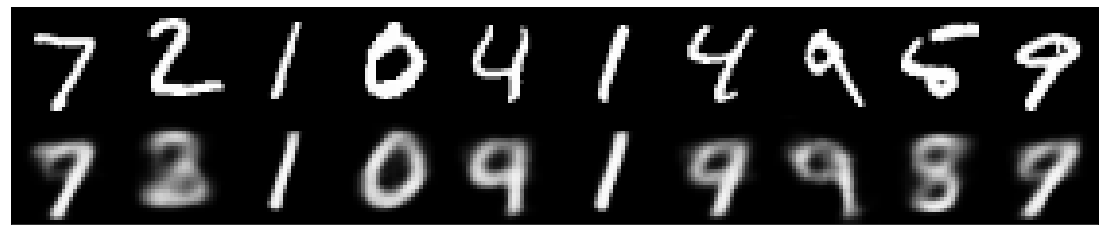

Epoch 102/200
60000/60000 [==============================] - 10s 173us/step - loss: 0.1882 - val_loss: 0.1894
Epoch 103/200
60000/60000 [==============================] - 10s 172us/step - loss: 0.1882 - val_loss: 0.1887
Epoch 104/200
60000/60000 [==============================] - 10s 173us/step - loss: 0.1879 - val_loss: 0.1884
Epoch 105/200
60000/60000 [==============================] - 10s 172us/step - loss: 0.1882 - val_loss: 0.1889
Epoch 106/200
60000/60000 [==============================] - 10s 174us/step - loss: 0.1881 - val_loss: 0.1885
Epoch 107/200
60000/60000 [==============================] - 10s 174us/step - loss: 0.1877 - val_loss: 0.1881
Epoch 108/200
60000/60000 [==============================] - 10s 173us/step - loss: 0.1875 - val_loss: 0.1885
Epoch 109/200
60000/60000 [==============================] - 10s 174us/step - loss: 0.1878 - val_loss: 0.1885
Epoch 110/200
60000/60000 [==============================] - 10s 173us/step - loss: 0.1876 - val_loss: 0.1886
Epoch 111/

60000/60000 [==============================] - 10s 170us/step - loss: 0.1849 - val_loss: 0.1855
Epoch 177/200
60000/60000 [==============================] - 10s 170us/step - loss: 0.1848 - val_loss: 0.1869
Epoch 178/200
60000/60000 [==============================] - 10s 169us/step - loss: 0.1845 - val_loss: 0.1852
Epoch 179/200
60000/60000 [==============================] - 10s 170us/step - loss: 0.1848 - val_loss: 0.1856
Epoch 180/200
60000/60000 [==============================] - 10s 170us/step - loss: 0.1845 - val_loss: 0.1856
Epoch 181/200
60000/60000 [==============================] - 10s 169us/step - loss: 0.1845 - val_loss: 0.1856
Epoch 182/200
60000/60000 [==============================] - 10s 169us/step - loss: 0.1847 - val_loss: 0.1858
Epoch 183/200
60000/60000 [==============================] - 10s 170us/step - loss: 0.1847 - val_loss: 0.1859
Epoch 184/200
60000/60000 [==============================] - 10s 169us/step - loss: 0.1845 - val_loss: 0.1849
Epoch 185/200
60000/6000

In [10]:
import time

from keras.callbacks import LambdaCallback, TensorBoard


imgs = x_test[:batch_size]
# imgs_lbls = y_test_cat[:batch_size]
n_compare = 10

epochs_to_check = np.linspace(0, 100, num=10).astype('int')


digit_size = 28
def plot_digits(*args):
    args = [x.squeeze() for x in args]
    n = min([x.shape[0] for x in args])
    figure = np.zeros((digit_size * len(args), digit_size * n))

    for i in range(n):
        for j in range(len(args)):
            figure[j * digit_size: (j + 1) * digit_size,
                   i * digit_size: (i + 1) * digit_size] = args[j][i].squeeze()

    plt.figure(figsize=(2 * n, 2 * len(args)))
    plt.imshow(figure, cmap='Greys_r')
    plt.grid(False)
    ax = plt.gca()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.show()


def on_epoch_end(epoch, logs):
    if epoch in epochs_to_check:
        decoded_imgs = ae_model.predict(imgs, batch_size=batch_size)
        plot_digits(imgs[:n_compare], decoded_imgs[:n_compare])


plt_fig = LambdaCallback(on_epoch_end=on_epoch_end)
tb      = TensorBoard(log_dir='./logs')

start_time = time.time()
ae_model.fit(x_train, x_train,
              batch_size=batch_size,
              epochs=200,
              shuffle=True,
              validation_data=(x_test, x_test),
              callbacks=[plt_fig, tb],
              verbose=1)
print("ALL AE TRAINING ELAPSED TIME: %s" % (time.time() - start_time))

### Try to decode random codes

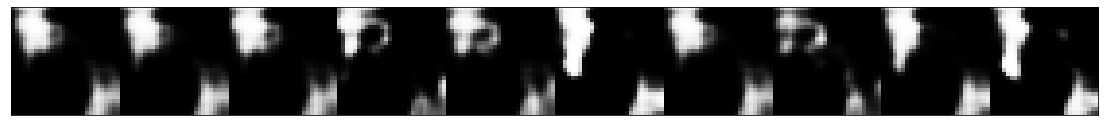

In [11]:
codes = np.random.randn(n_compare, latent_dim)
decoded_from_codes = ae_decoder.predict(codes, batch_size=n_compare)
plot_digits(decoded_from_codes)


# SAVE MODELS

In [12]:
import os
import json

save_path = os.path.join("saved_models", "convolutional_ae")
if not os.path.exists(save_path):
    os.mkdir(save_path)

with open(os.path.join(save_path, "ae_2_ldim_200_epochs.json"), "w") as f:
    json.dump(ae_model.to_json(), f, indent=4)
ae_model.save_weights(os.path.join(save_path, "ae.h5"))

with open(os.path.join(save_path, "ae_encoder_2_ldim_200_epochs.json"), "w") as f:
    json.dump(ae_encoder.to_json(), f, indent=4)
ae_encoder.save_weights(os.path.join(save_path, "ae_encoder_2_ldim_200_epochs.h5"))

with open(os.path.join(save_path, "ae_decoder_2_ldim_200_epochs.json"), "w") as f:
    json.dump(ae_decoder.to_json(), f, indent=4)
ae_decoder.save_weights(os.path.join(save_path, "ae_decoder_2_ldim_200_epochs.h5"))

In [15]:
%load_ext tensorboard

In [16]:
%tensorboard --logdir ./logs

Reusing TensorBoard on port 6006 (pid 10580), started 0:01:29 ago. (Use '!kill 10580' to kill it.)